In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text  
import numpy as np

In [2]:
data_dv = pd.read_csv('../data-generator/newest-data-base/full-dv-data.csv')

In [3]:
data_dv = data_dv[(data_dv['Nível de ensino'] == "Graduação") & 
        (data_dv['Curso'] != 'Curso Superior De Tecnologia Em Horticultura')]

In [4]:
data_dv_sorted = data_dv.sort_values(by=['Nome', 'Ano', 'Semestre', 'Período'], ascending=[True, True, True, True])
data_dv_last_occurence = data_dv_sorted.drop_duplicates(subset='Nome', keep='last')
data_dv_last_occurence.reset_index(drop=True, inplace=True)

In [5]:
dfs = {
    'data_dv': data_dv,
    'data_dv_last_occurence': data_dv_last_occurence
}

Todos os Registros dos Alunos


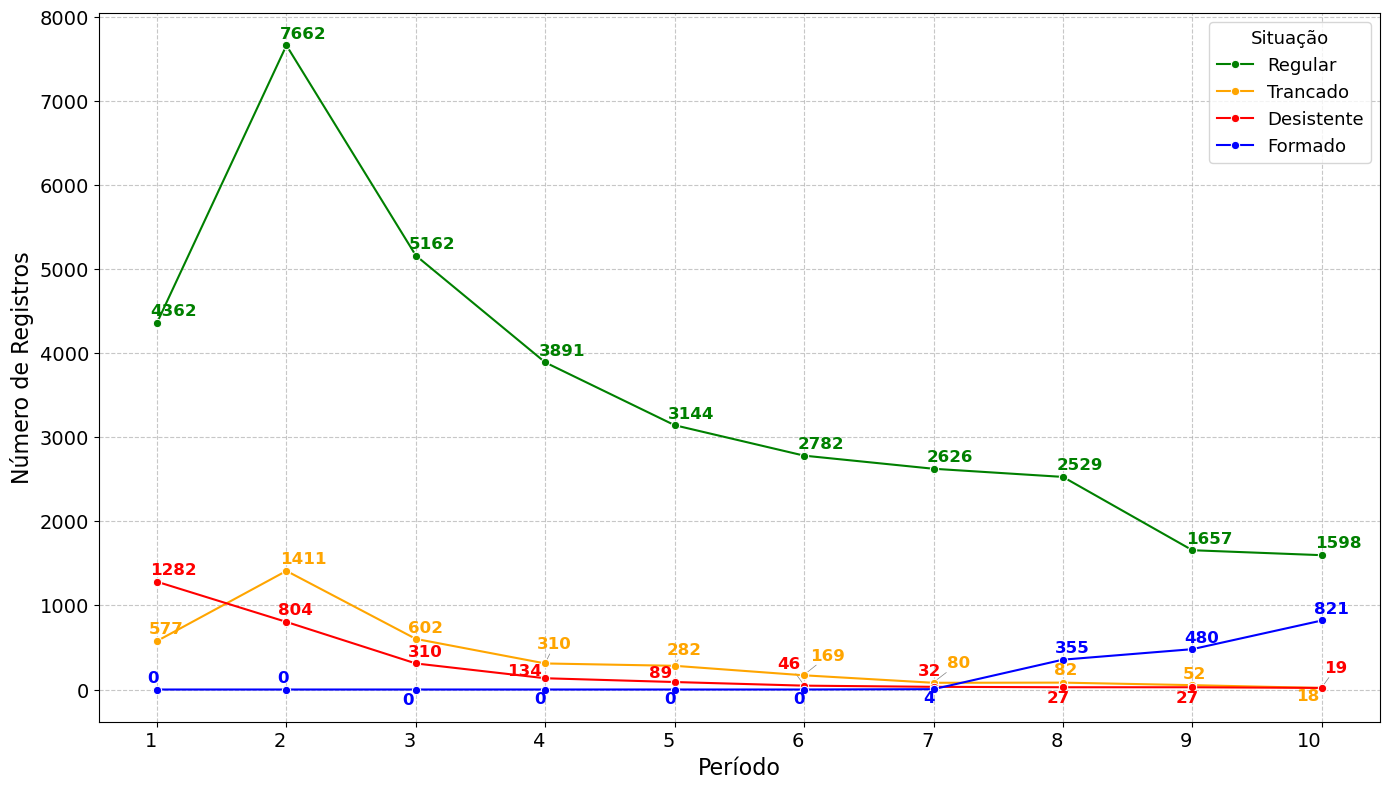

Apenas os Últimos Registros
28 [-0.99172699 -0.88242721]
31 [ 0.00096769 -0.01563824]


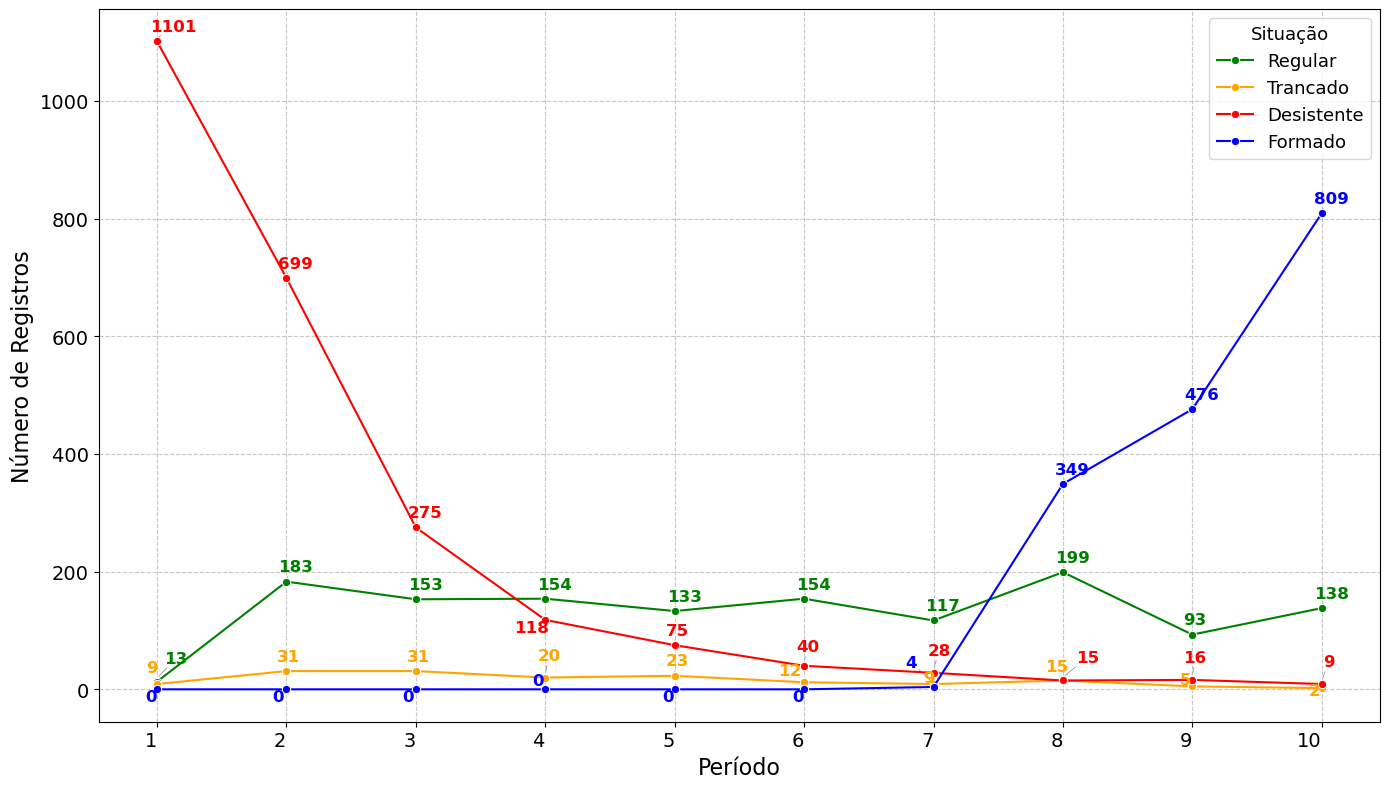

In [6]:
def process_data(data, name):
    if 'data_dv_last_occurence' in name:
        dataName = "Apenas os Últimos Registros"
        identifier = "data_dv_last_occurence"
        width = 14
        height = 8
    elif 'data_dv' in name:
        dataName = "Todos os Registros dos Alunos"
        identifier = "data_dv"
        width = 14
        height = 8
  
    print(dataName)

    counts = data.groupby(['Período', 'Situação']).size().unstack(fill_value=0).reset_index()
    counts = counts[['Período', 'Regular', 'Desistente', 'Formado', 'Trancado']]

    df_melted = pd.melt(counts, id_vars='Período', var_name='Situação', value_name='Quantidade')

    df_melted['Período'] = pd.Categorical(df_melted['Período'], categories=sorted(df_melted['Período'].unique()), ordered=True)
    df_melted = df_melted.sort_values('Período')

    plt.figure(figsize=(width, height))
    g = sns.lineplot(data=df_melted, x='Período', y='Quantidade', hue='Situação', marker='o',
                     palette={'Regular': 'green', 'Desistente': 'red', 'Formado': 'blue', 'Trancado': 'orange'})

    g.set_xlabel("Período", fontsize=16)
    g.set_ylabel("Número de Registros", fontsize=16)
    g.legend(title="Situação", title_fontsize=13, fontsize=13)

    line_colors = {text.get_text(): line.get_color() for text, line in zip(g.legend_.texts, g.lines)}

    texts = []
    for line in range(0, df_melted.shape[0]):
        if df_melted['Quantidade'].iloc[line] >= 0: 
            situacao = df_melted['Situação'].iloc[line]
            current_y = df_melted.Quantidade.iloc[line]

            offset = 5.8 
            text_color = line_colors[situacao]
            text = g.text(df_melted.Período.iloc[line], current_y + offset, 
                          df_melted.Quantidade.iloc[line],
                          ha='center', size=12, color=text_color, weight='semibold')
            texts.append(text)

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

    plt.xticks(ticks=sorted(df_melted['Período'].unique()), ha='right', fontsize=14)
    plt.yticks(fontsize=14)

    #plt.title(f'Contagem de Situações por Período - {dataName}', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    
    plt.savefig(f"plots/situation-by-period-01-{identifier}.pdf", bbox_inches='tight')
    plt.show()

for name, dataset in dfs.items():
    process_data(dataset, name)


Todos os Registros dos Alunos


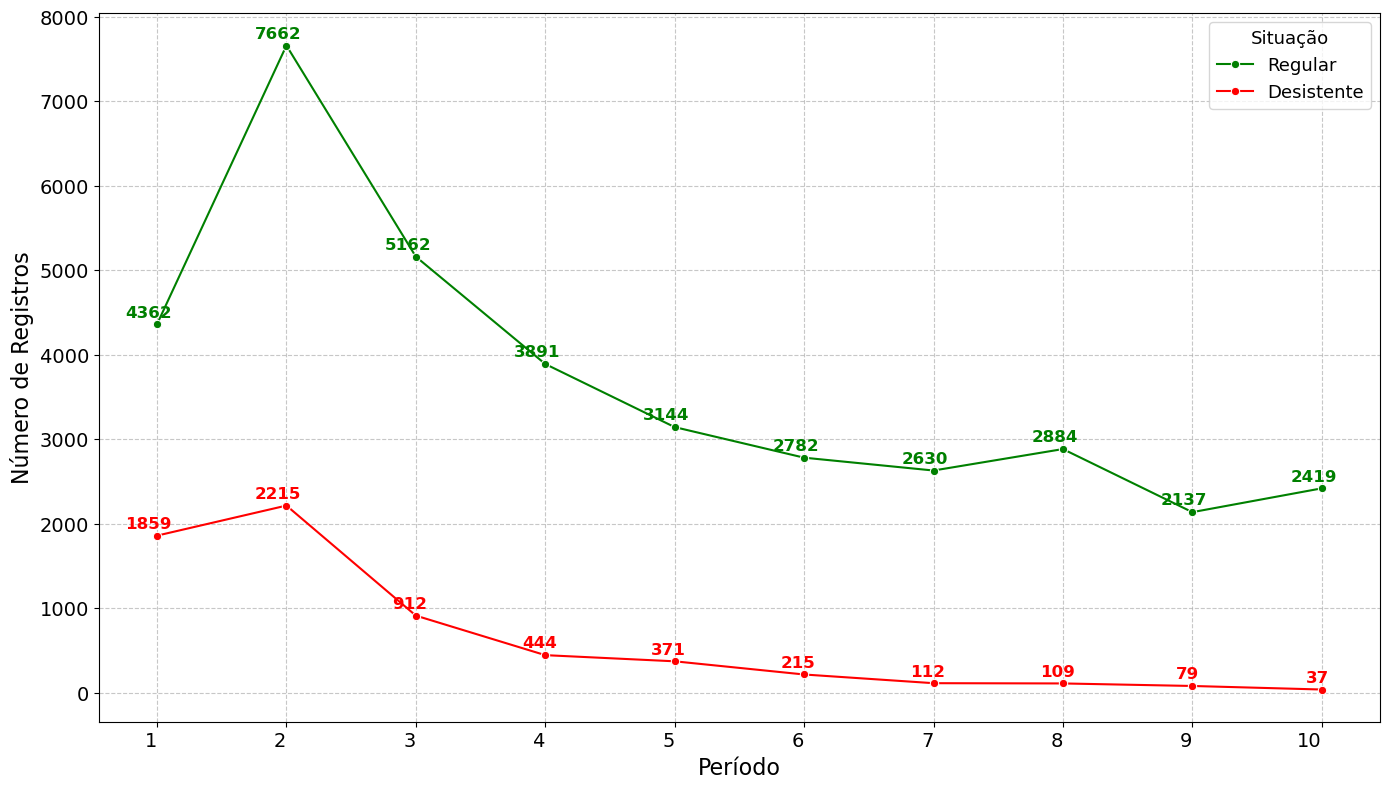

Apenas os Últimos Registros


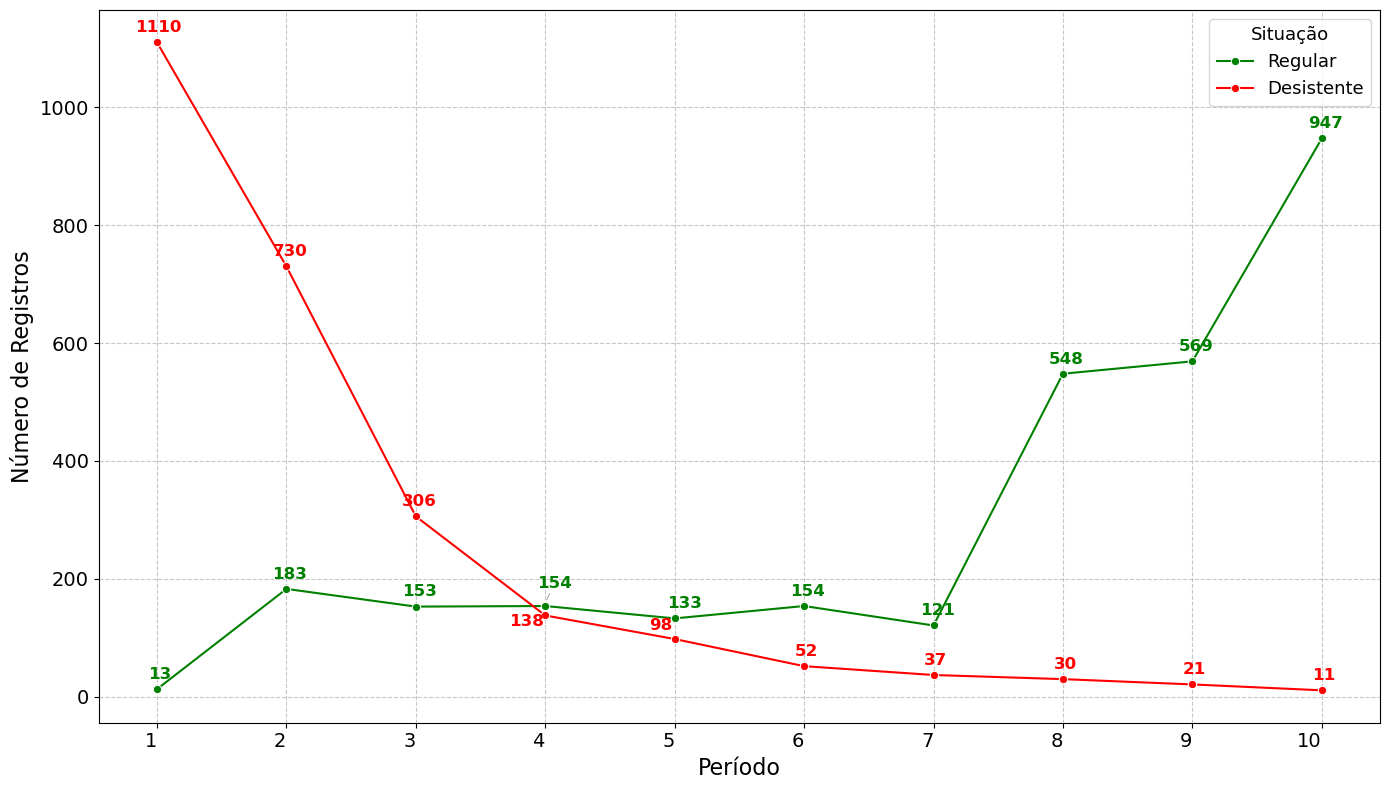

In [7]:
def process_data(data, name):
    if 'data_dv_last_occurence' in name:
        dataName = "Apenas os Últimos Registros"
        identifier = "data_dv_last_occurence"
        width = 14
        height = 8
    elif 'data_dv' in name:
        dataName = "Todos os Registros dos Alunos"
        identifier = "data_dv"
        width = 14
        height = 8
  
    print(dataName)

    counts = data.groupby(['Período', 'Situação']).size().unstack(fill_value=0).reset_index()
    counts['Regular'] += counts.get('Formado', 0)
    counts['Desistente'] += counts.get('Trancado', 0)
    
    counts = counts[['Período', 'Regular', 'Desistente']]

    df_melted = pd.melt(counts, id_vars='Período', var_name='Situação', value_name='Quantidade')

    df_melted['Período'] = pd.Categorical(df_melted['Período'], categories=sorted(df_melted['Período'].unique()), ordered=True)
    df_melted = df_melted.sort_values('Período')

    plt.figure(figsize=(width, height))
    g = sns.lineplot(data=df_melted, x='Período', y='Quantidade', hue='Situação', marker='o',
                     palette={'Regular': 'green', 'Desistente': 'red', 'Formado': 'blue', 'Trancado': 'orange'})

    g.set_xlabel("Período", fontsize=16)
    g.set_ylabel("Número de Registros", fontsize=16)
    g.legend(title="Situação", title_fontsize=13, fontsize=13)

    line_colors = {text.get_text(): line.get_color() for text, line in zip(g.legend_.texts, g.lines)}

    texts = []
    for line in range(0, df_melted.shape[0]):
        if df_melted['Quantidade'].iloc[line] >= 0: 
            situacao = df_melted['Situação'].iloc[line]
            current_y = df_melted.Quantidade.iloc[line]

            offset = 5.8 
            text_color = line_colors[situacao]
            text = g.text(df_melted.Período.iloc[line], current_y + offset, 
                          df_melted.Quantidade.iloc[line],
                          ha='center', size=12, color=text_color, weight='semibold')
            texts.append(text)

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

    plt.xticks(ticks=sorted(df_melted['Período'].unique()), ha='right', fontsize=14)
    plt.yticks(fontsize=14)

    #plt.title(f'Contagem de Situações por Período - {dataName}', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    
    plt.savefig(f"plots/RegFor-DesisTranc-{identifier}.pdf", bbox_inches='tight')
    plt.show()

for name, dataset in dfs.items():
    process_data(dataset, name)


In [8]:
locked_students = data_dv_sorted[data_dv_sorted['Situação'] == 'Trancado']
unique_students = locked_students['Nome'].unique()

In [9]:
filtered_data = data_dv_sorted[data_dv_sorted['Nome'].isin(unique_students)]

In [10]:
filtered_data = filtered_data.sort_values(by=['Nome', 'Período'])
last_occurrence = filtered_data.groupby('Nome').last().reset_index()

In [11]:
situation_counts = last_occurrence['Situação'].value_counts().reset_index()
situation_counts.columns = ['Situação', 'Quantidade']
situation_counts

,Situação,Quantidade
0,Desistente,680
1,Trancado,153
2,Regular,112
3,Formado,84
4,Transferido,26
5,Mudou de Curso,8
6,Enade pendente,1


C:\Users\pedro\AppData\Local\Temp\ipykernel_19112\4156518796.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Situação', y='Quantidade', data=situation_counts, palette=palette)
C:\Users\pedro\AppData\Local\Temp\ipykernel_19112\4156518796.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(x='Situação', y='Quantidade', data=situation_counts, palette=palette)


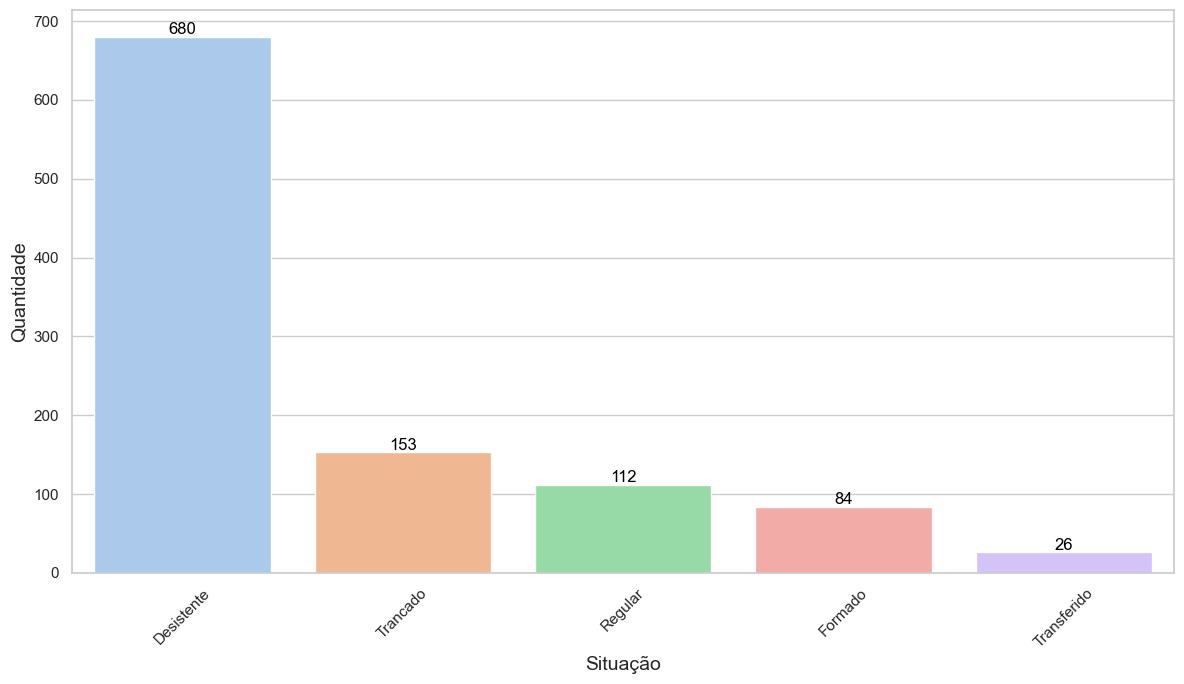

In [12]:
situation_counts = situation_counts[situation_counts['Quantidade'] > 10]

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")  

ax = sns.barplot(x='Situação', y='Quantidade', data=situation_counts, palette=palette)
ax.set_xlabel("Situação", fontsize=14)
ax.set_ylabel("Quantidade", fontsize=14)
#ax.set_title("Situação atual dos alunos que em algum momento trancaram o curso AP", fontsize=16)
ax.tick_params(axis='x', rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points',
                fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [13]:
situation_counts = last_occurrence['Situação'].value_counts()
situation_counts

Situação
Desistente        680
Trancado          153
Regular           112
Formado            84
Transferido        26
Mudou de Curso      8
Enade pendente      1
Name: count, dtype: int64

In [14]:
top_classes = ['Desistente', 'Regular', 'Trancado', 'Formado']
other_classes = situation_counts[~situation_counts.index.isin(top_classes)]

situation_counts = pd.concat([
    situation_counts[top_classes], 
    pd.Series(other_classes.sum(), index=['Outros'])
])
situation_counts

Desistente    680
Regular       112
Trancado      153
Formado        84
Outros         35
dtype: int64

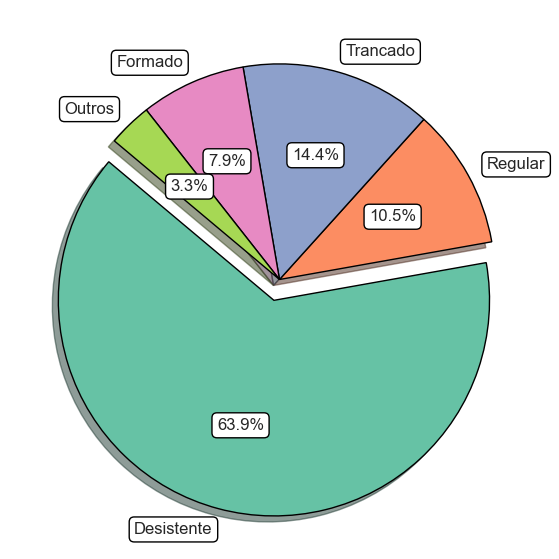

In [15]:
situation_counts = pd.Series({
    'Desistente': 680,
    'Regular': 112,
    'Trancado': 153,
    'Formado': 84,
    'Outros': 35
})

top_classes = ['Desistente', 'Regular', 'Trancado', 'Formado']
other_classes = situation_counts[~situation_counts.index.isin(top_classes)]

situation_counts = pd.concat([
    situation_counts[top_classes], 
    pd.Series(other_classes.sum(), index=['Outros'])
])

labels = situation_counts.index.tolist()
sizes = situation_counts.values.tolist()

plt.figure(figsize=(10, 7))
explode = (0.1, 0, 0, 0, 0)  

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=sns.color_palette("Set2"),  
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'bbox': dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')}
)


plt.savefig(f"plots/locked-analysos.pdf", bbox_inches='tight')
plt.show()
